<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-и-подготовка-данных" data-toc-modified-id="1.-Загрузка-и-подготовка-данных-1">1. Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Визуализация-полученных-данных" data-toc-modified-id="1.1-Визуализация-полученных-данных-1.1">1.1 Визуализация полученных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2">Вывод</a></span></li></ul></li><li><span><a href="#2.-Обучение-и-проверка-модели" data-toc-modified-id="2.-Обучение-и-проверка-модели-2">2. Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#3.-Подготовка-к-расчёту-прибыли" data-toc-modified-id="3.-Подготовка-к-расчёту-прибыли-3">3. Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1">Выводы</a></span></li></ul></li><li><span><a href="#4.-Расчёт-прибыли-и-рисков" data-toc-modified-id="4.-Расчёт-прибыли-и-рисков-4">4. Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5">Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Нужно решить, где бурить новую скважину.

Получены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 


Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Кол-во месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль должна быть равна суммарной прибыли отобранных месторождений.

**Задача**

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше **2.5%**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import trange


from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

RANDOM = 2102
RND_STATE = RandomState(RANDOM) 

## 1. Загрузка и подготовка данных

In [2]:
zero_df = pd.read_csv('/datasets/geo_data_0.csv')
first_df = pd.read_csv('/datasets/geo_data_1.csv')
second_df = pd.read_csv('/datasets/geo_data_2.csv')

all_df = {'Zero_Data' : zero_df.copy(),
          'First_Data' : first_df.copy(),
          'Second_Data' : second_df.copy()}

In [3]:
def label(name):
    """
    Формат этикетки:
        -----------------
        #   Имя_Ключа   #
        -----------------
    """
    name_string = f"#   {name}   #"
    print("", "-" * len(name_string), "\n", (name_string), "\n", "-" * len(name_string))

In [4]:
for key in all_df:
    label(key)
    
    print(all_df[key].info())
    print(f'Количество дубликатов в столбце id: {all_df[key]["id"].duplicated().sum()}')
    print(f'Количество дубликатов строк: {all_df[key].duplicated().sum()}')
    display(all_df[key].describe())

 ----------------- 
 #   Zero_Data   # 
 -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов в столбце id: 10
Количество дубликатов строк: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


 ------------------ 
 #   First_Data   # 
 ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов в столбце id: 4
Количество дубликатов строк: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


 ------------------- 
 #   Second_Data   # 
 -------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов в столбце id: 4
Количество дубликатов строк: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


В столбце `id` есть дубликаты это говорит о том, что в данных есть строки с информацией полученной с одной и той-же скважины, поэтому я удалю **все** дуюлирующиеся скважины. (Удаляю все т.к. мы не знаем какая из дубликатов окажутся верными значениями. Возможно произошел сбой при выгрузке из бд или это могла быть обычная опечатка)

In [5]:
for key in all_df:
    all_df[key] = all_df[key].drop_duplicates(subset=['id'], keep=False, inplace=False)

### 1.1 Визуализация полученных данных

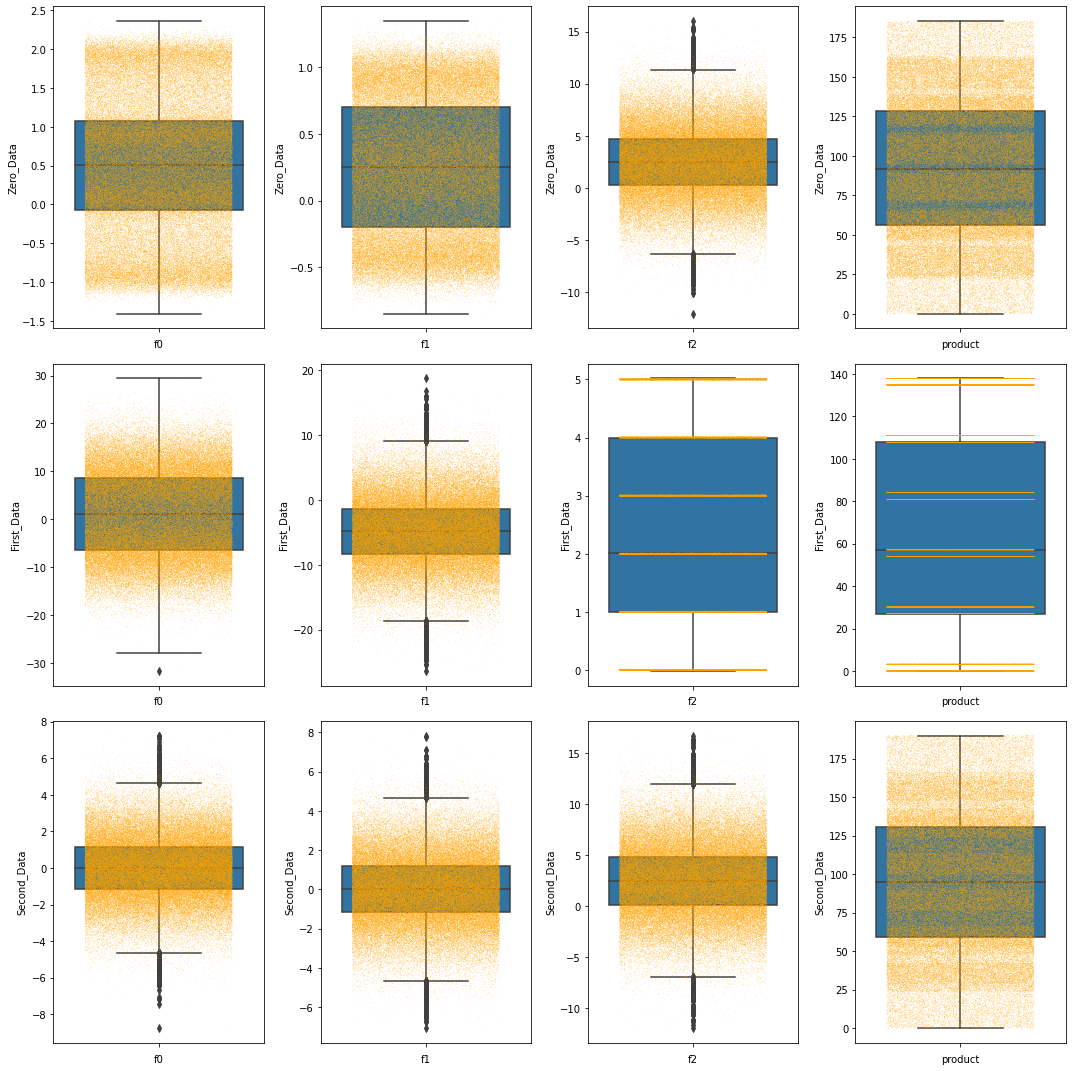

In [6]:
columns = all_df['Zero_Data'].columns[1:] # Смотрю от 1 т.к. 'id' нам не нужен

# subplots
rows = len(all_df)
cols = len(columns)
fig, ax = plt.subplots(rows, cols, figsize=(15, 15))

# Построение графиков
for row, key in enumerate(all_df):
    for col, name_col in enumerate(columns):
        sns.boxplot(y=all_df[key][name_col], ax=ax[row, col])
        (sns.stripplot(y=all_df[key][name_col], color="orange", jitter=0.35, size=0.5, ax=ax[row, col])
         .set(xlabel=name_col, ylabel=key))
        
plt.tight_layout()
plt.show()

Исходя из полученных данных, во всех трех случаях прослеживается выделение групп в столбце `product`, также для `First_Data` прослеживается очень сильная кореляция столбца `f2` и `product`, скорее всего нам придется удалить этот признак для `First_Data`. Чтобы в этом убедится построим `heatmap` с корреляцией для кажого из датафреймов и посмотрим на результаты.

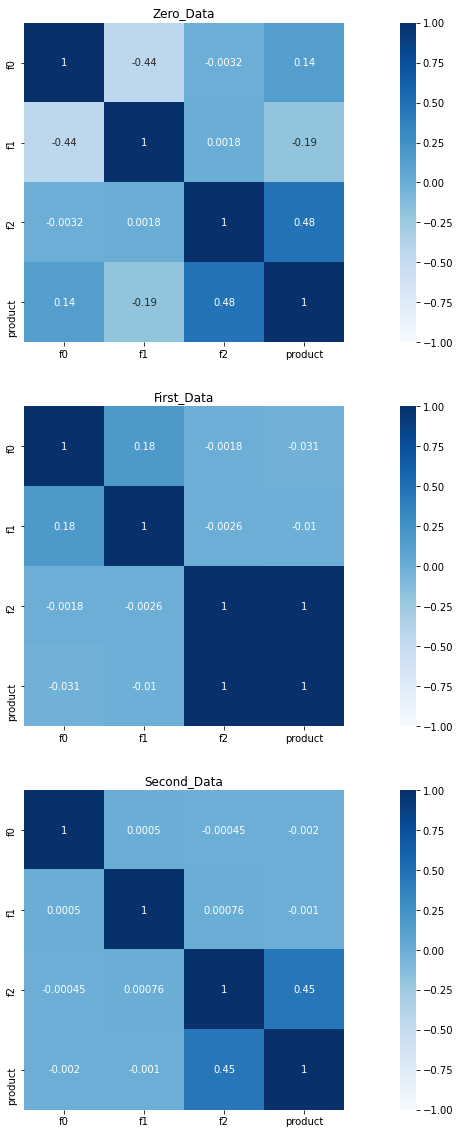

In [7]:
# subplots
rows = len(all_df)
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))

# Построение графиков
for row, key in enumerate(all_df):
    sns.heatmap(all_df[key].corr(), annot=True, square=True, vmin=-1, vmax=1, cmap="Blues", ax=ax[row])
    ax[row].set_title(key)

Все дальньейшие выводы, о **линейной зависимости**, делаю опираясь на шкалу Чеддока.

**Zero_Data:**
* Умеренная отрицательная корреляция признаков `f1` и `f0`;
* Умеренная положительная корреляция признака `f2` и целевого признака `product`;
* В остальных случаях корреляция слабая или ее нет совсем.

**First_Data:**
* Слабая положительная корреляция признаков `f1` и `f0`;
* Аномально высокая положительная корреляция признака `f2` и целевого признака `product`;
* В остальных случаях корреляция слабая или ее нет совсем.

**Second_Data:**
* Умеренная положительная корреляция признака `f2` и целевого признака `product`;
* В остальных случаях корреляция слабая или ее нет совсем.

Так как в `First_Data` у признака `f2` и целевого признака `product` обнаружена аномально высокая корреляция, то я дополнительно рассмотрю `Firs_Data` без признака `f2`.

In [8]:
all_df['First_Data_without_f2'] = all_df['First_Data'].drop(["f2"],axis = 1)

### Вывод

Результаты первичного анализа:
   1. Каждый из датасетов состоит из `100000` строк.
   2. Типы столбцов - корректны
   3. Названия столбцов - корректны
   2. Были удалены дублирующиеся скважены.
   4. Объем запасов - положительный
   3. Коррелирующие признаки - учтены

***
## 2. Обучение и проверка модели

In [9]:
data_dict = {"pipelines":{},"scores":{},"valid":{}}

for key in all_df:
    features = all_df[key].drop(["id","product"], axis = 1)
    target = all_df[key]["product"]
    
    new_pipeline = make_pipeline(StandardScaler(),LinearRegression())
    
    (features_train,
    features_valid,
    target_train,
    target_valid) = train_test_split(features,
                                     target,
                                     test_size = 0.25,
                                     random_state = RANDOM)
    
    data_dict['valid'][key] = (features_valid, target_valid)
    new_pipeline.fit(features_train, target_train)
    
    data_dict['pipelines'][key] = new_pipeline
    data_dict['scores'][key] = mean_squared_error(target_valid, new_pipeline.predict(features_valid))**0.5

In [10]:
data_dict['scores']

{'Zero_Data': 37.58138443691128,
 'First_Data': 0.8891284780210635,
 'Second_Data': 40.13444717518152,
 'First_Data_without_f2': 45.94032324997836}

**Выборка с минимальной ошибкой:**
   1. `First_data` - идеальный скор :) (Из за аномально высокой корреляции)
   2. `Zero_Data`
   3. `Second_Data`
   4. `First_Data_without_f2` - больше похоже на реальное значение (На мой взгляд)

In [11]:
array_name = ['Zero_Data', 'First_Data', 'Second_Data', 'First_Data_without_f2']
data_dict['predicted_values'] = {}
data_dict['rmse_model'] = {}

for name in array_name:
    label(name)
    
    best_model = data_dict['pipelines'][name]
    predicted_values = best_model.predict(data_dict['valid'][name][0])
    data_dict['predicted_values'][name] = predicted_values
    
    data_dict['rmse_model'][name] = (mean_squared_error(data_dict['valid'][name][1], predicted_values))**0.5
    
    print(f'RMSE: {data_dict["rmse_model"][name]}')
    print(f'Средний запас: {predicted_values.mean()} \n')

 ----------------- 
 #   Zero_Data   # 
 -----------------
RMSE: 37.58138443691128
Средний запас: 92.23365772585505 

 ------------------ 
 #   First_Data   # 
 ------------------
RMSE: 0.8891284780210635
Средний запас: 69.09967256202779 

 ------------------- 
 #   Second_Data   # 
 -------------------
RMSE: 40.13444717518152
Средний запас: 95.00100446365335 

 ----------------------------- 
 #   First_Data_without_f2   # 
 -----------------------------
RMSE: 45.94032324997836
Средний запас: 68.76379211566775 



### Вывод

**Zero_Data**
* Ошибка в нулевом регионе самая маленькая (из правдоподобных), но по среднему объему запасов регион на втором мест.

**First_Data**
* Наименьшая ошибка и наименьший запас.

**Second_Data**
* Самый большой средний объем запасов, но по ошибке регион на втором месте.

**First_Data_whithout_f2**
* Наибольшая ошибка и наименьший обем запасов.

***
## 3. Подготовка к расчёту прибыли

In [12]:
BUDGET_PER_REGION = 10*(10**9)
PRE_MAX_POINTS = 500
FINAL_MAX_POINTS = 200
PRICE_PER_BARREL = 450_000
DAMAGE_THRESHOLD =  0.025
NON_DAMAGE_POINT = (BUDGET_PER_REGION/(PRICE_PER_BARREL))/(FINAL_MAX_POINTS)

In [13]:
print("Достаточный объем добычи для безубыточной разработки", round(NON_DAMAGE_POINT,3))

Достаточный объем добычи для безубыточной разработки 111.111


Посмотрим распределение значений по районам

In [14]:
for name in array_name:
    label(name)
    
    array_length = len(all_df[name]["product"])
    length_with_condition = len(all_df[name]["product"].loc[all_df[name]["product"] > NON_DAMAGE_POINT])
    
    display(all_df[name].describe())
    print(f'{round(length_with_condition / (array_length / 100), 1)}% скважин в {name} содержат больше сырья, чем {NON_DAMAGE_POINT} \n')
    data_dict['valid'][name][1]

 ----------------- 
 #   Zero_Data   # 
 -----------------


,f0,f1,f2,product
count,99980.000000,99980.000000,99980.000000,99980.000000
mean,0.500447,0.250147,2.502638,92.499166
std,0.871879,0.504431,3.248056,44.289044
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072674,-0.200869,0.288010,56.496513
50%,0.502374,0.250252,2.516005,91.847928
75%,1.073692,0.700646,4.714884,128.564089
max,2.362331,1.343769,16.003790,185.364347


36.6% скважин в Zero_Data содержат больше сырья, чем 111.11111111111111 

 ------------------ 
 #   First_Data   # 
 ------------------


,f0,f1,f2,product
count,99992.000000,99992.000000,99992.000000,99992.000000
mean,1.141363,-4.796522,2.494511,68.824148
std,8.965805,5.119934,1.703587,45.944889
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298525,-8.267985,1.000021,26.953261
50%,1.153190,-4.813005,2.011475,57.085625
75%,8.620964,-1.332704,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


16.5% скважин в First_Data содержат больше сырья, чем 111.11111111111111 

 ------------------- 
 #   Second_Data   # 
 -------------------


,f0,f1,f2,product
count,99992.000000,99992.000000,99992.000000,99992.000000
mean,0.001975,-0.002113,2.495088,94.998767
std,1.732061,1.730404,3.473491,44.747763
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174820,0.130269,59.450441
50%,0.009411,-0.009580,2.484236,94.925026
75%,1.158442,1.163592,4.858662,130.585544
max,7.238262,7.844801,16.739402,190.029838


38.2% скважин в Second_Data содержат больше сырья, чем 111.11111111111111 

 ----------------------------- 
 #   First_Data_without_f2   # 
 -----------------------------


,f0,f1,product
count,99992.000000,99992.000000,99992.000000
mean,1.141363,-4.796522,68.824148
std,8.965805,5.119934,45.944889
min,-31.609576,-26.358598,0.000000
25%,-6.298525,-8.267985,26.953261
50%,1.153190,-4.813005,57.085625
75%,8.620964,-1.332704,107.813044
max,29.421755,18.734063,137.945408


16.5% скважин в First_Data_without_f2 содержат больше сырья, чем 111.11111111111111 



### Выводы

Минимальное количество баррелей нефти для безубыточной разработки - 111.(1)

В нулевом и втором районах `~35%` скважин проходят минимальный порог, в то время как в первом районе подходят только `16%` скважин

***
## 4. Расчёт прибыли и рисков 

In [15]:
def top200_income(true_target, pred_target):
    sort_Series = pd.Series(pred_target).sort_values(ascending=False)[:FINAL_MAX_POINTS]
    true_target_sort = (true_target.reset_index(drop = True)[sort_Series.index])
    sum_true = true_target_sort.sum()
    return round((sum_true * PRICE_PER_BARREL) - BUDGET_PER_REGION,2)

In [16]:
def oil_hist(seria, bins, title, ax):
    (sns.distplot(a=seria, bins=bins, hist=True, kde=True, rug=True, ax=ax,)
     .set(xlabel="Объем нефти на скважину, тыс. барелей", ylabel="Количество скважин", title=title))

In [17]:
def confidence_interval(true_target, pred_target):
    samples = []
    for i in trange(1000):
        sample = pd.Series(pred_target).sample(n = PRE_MAX_POINTS, replace=True, random_state=RND_STATE)
        samples.append(top200_income(true_target, sample))
    samples = pd.Series(samples)
    print(f'Средняя прибыль с одной скважины: {samples.mean()}')
    print(f'Риск: {(samples < 0).mean() * 100}%') # == print(f'Риск: {samples.apply(lambda x: x < 0).sum()/len(samples)*100}%')
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return round(lower,2), round(upper,2)

 ----------------- 
 #   Zero_Data   # 
 -----------------


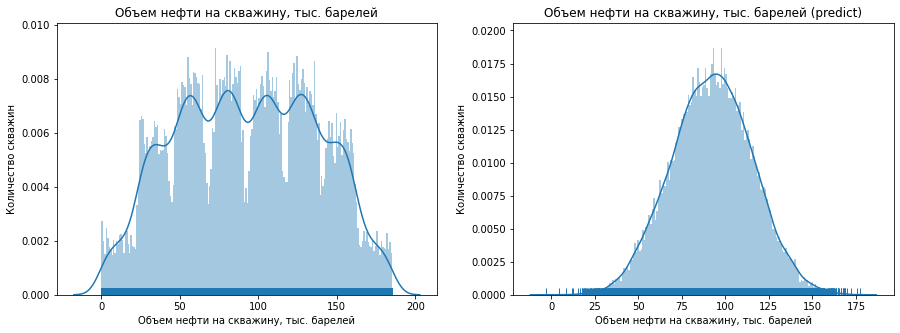

Прибыль с лучших 200 скважин в Zero_Data: 3447657384.47


100%|██████████| 1000/1000 [00:01<00:00, 923.51it/s]


Средняя прибыль с одной скважины: 408684376.07397
Риск: 5.5%
95% доверительный итервал для Zero_Data лежит между: (-94351785.35, 907378870.6) 

 ------------------ 
 #   First_Data   # 
 ------------------


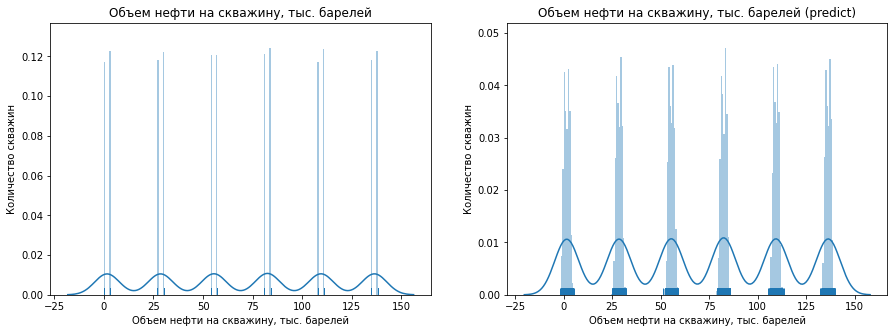

Прибыль с лучших 200 скважин в First_Data: 2415086696.68


100%|██████████| 1000/1000 [00:01<00:00, 966.77it/s]


Средняя прибыль с одной скважины: 473045688.58273
Риск: 0.8%
95% доверительный итервал для First_Data лежит между: (75298468.14, 850894622.61) 

 ------------------- 
 #   Second_Data   # 
 -------------------


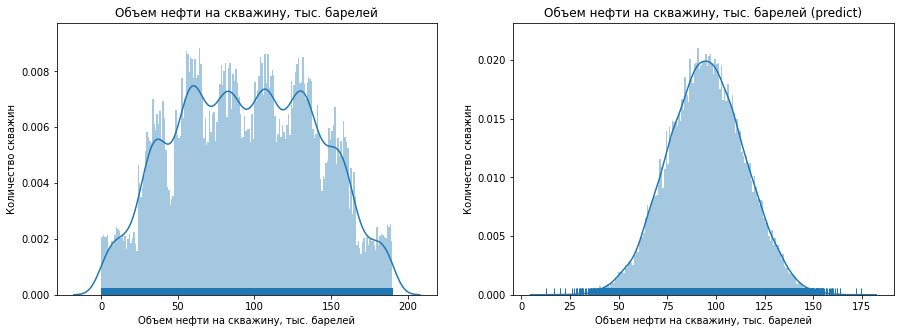

Прибыль с лучших 200 скважин в Second_Data: 2461431516.44


100%|██████████| 1000/1000 [00:01<00:00, 936.05it/s]


Средняя прибыль с одной скважины: 309602530.26032
Риск: 12.4%
95% доверительный итервал для Second_Data лежит между: (-216687084.81, 831859236.32) 

 ----------------------------- 
 #   First_Data_without_f2   # 
 -----------------------------


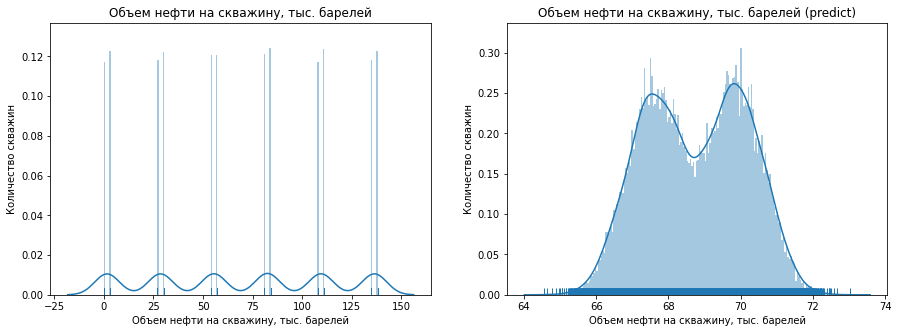

Прибыль с лучших 200 скважин в First_Data_without_f2: -3879847417.23


100%|██████████| 1000/1000 [00:01<00:00, 952.53it/s]

Средняя прибыль с одной скважины: -3651477122.2351604
Риск: 100.0%
95% доверительный итервал для First_Data_without_f2 лежит между: (-4231659003.51, -3092770728.55) 



In [18]:
for name in array_name:
    label(name)
    
    income = top200_income(data_dict['valid'][name][1], data_dict['predicted_values'][name])
    
    # subplots
    rows = 1
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=(15, 5))
    
    
    oil_hist(data_dict['valid'][name][1], 200, "Объем нефти на скважину, тыс. барелей", ax[0])
    oil_hist(data_dict['predicted_values'][name], 200, "Объем нефти на скважину, тыс. барелей (predict)", ax[1])
    plt.show()
    
    print(f'Прибыль с лучших 200 скважин в {name}: {income}')
    print(f'95% доверительный итервал для {name} лежит между: {confidence_interval(data_dict["valid"][name][1], data_dict["predicted_values"][name])} \n')

По гистограммам можно понять, что у нулевого и второго региона распределение скважин близкое к нормальному. 

В первом регионе данные имеют странное распределение: от `0` до `5` баррелей с шагом по `15-20` равномерно распределены `100000` значений. Скорее всего данные были введены искуственно.

***
## Вывод

Результаты первичного анализа:
   1. Каждый из датасетов состоит из `100000` строк.
   2. Типы столбцов - корректны
   3. Названия столбцов - корректны
   2. Были удалены дублирующиеся скважены.
   4. Объем запасов - положительный
   3. Коррелирующие признаки - учтены

По условиям задачи после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше `2.5%`. Такому условию удовлетворяет лишь один регион - `First_Data`, но т.к. в данных данного региона была обнаружена анамально большая корреляция, а также появление этих данных находится под сомнением, **то мы НЕ можем советовать** бизнесу обратить внимание на данный регион.

Наиболее перспективным регионом, на мой взгляд, является `Zero_Data` т.к. в данном регионе набольшая средняя прибыль с одной скважины:
* Средняя прибыль с одной скважины: `421452532.21`
* Риск: `5.3%`
* 95% доверительный итервал для `Zero_Data` лежит между: (`-102495199.56`, `963174257.85`)